In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from itertools import combinations
import scipy
import re
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Q1

In [33]:
df= pd.read_csv('Auto.csv')     #Reading and cleaning data
df = df.drop(columns=['Unnamed: 0'])
df['mpg01'] = df['mpg'] > df['mpg'].median()
df['mpg01'] = df['mpg01'].astype(int)
df = df.drop(columns=['mpg'])
df  #overview of dataset


,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,4,120.0,79,2625,18.6,82,1,ford ranger,1


## Q2

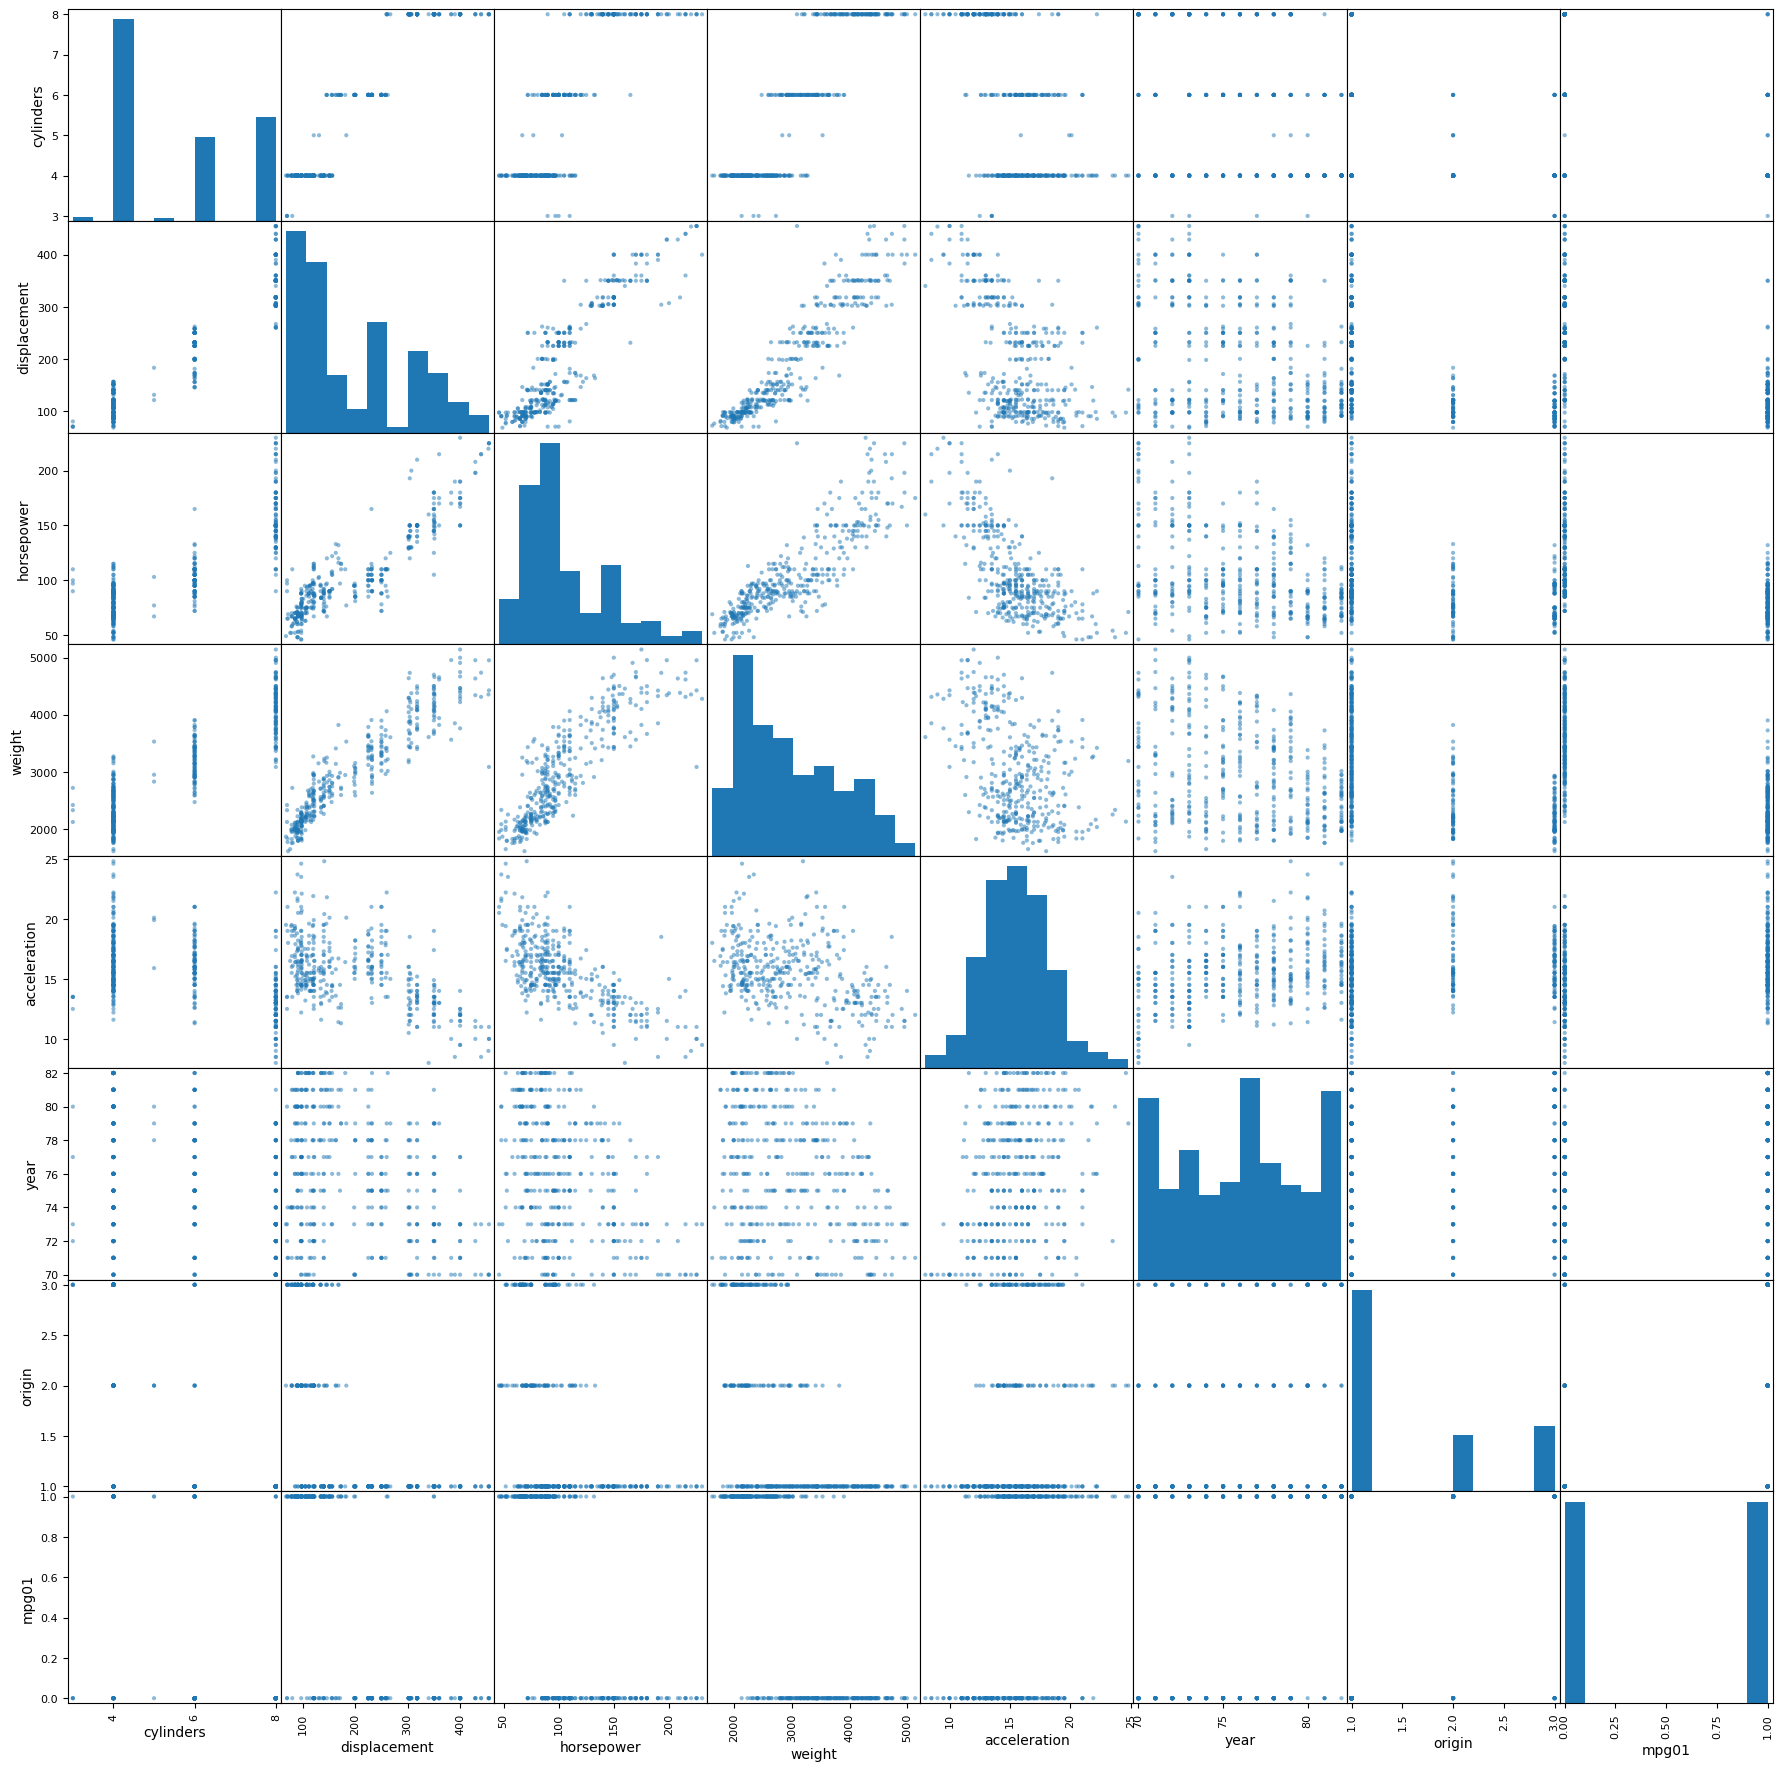

In [26]:
mtx = pd.plotting.scatter_matrix(df,figsize=(22,22))  #scatter plot, we only need last row

According to the scatterplots we have, there are only four variables that may be helpful in predicting mgp01, which are horsepower, weight, acceleration and displacement. For all four of the variables, when the variables is small, mpg01 concentrates on the left side; when the variables are big, the mpg01 concentrates on the right side. For vairables of year, origin and cylinders, there are no obvious relationships opbserved.

In [34]:
df = df[['mpg01','displacement','horsepower','weight','acceleration']] 
df      #rewnew dataframe, only remain variables we look at

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,8,302.0,140,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
388,4,97.0,52,2130,24.6,82,2,vw pickup,1
389,4,135.0,84,2295,11.6,82,1,dodge rampage,1
390,4,120.0,79,2625,18.6,82,1,ford ranger,1


## Q3,4,5

In [103]:
lda_dict = {
            'displacement':[],
            'horsepower':[],
            'weight':[],
            'acceleration':[]
            }

qda_dict = {
            'displacement':[],
            'horsepower':[],
            'weight':[],
            'acceleration':[]
            }
for _ in range(1000):           #Iteration 1000times for different train&test set
    train = df.sample(n=300,replace=False)  #train set
    test = df.drop(train.index)             #test set


    
    #LDA test
    lda = LinearDiscriminantAnalysis()
    col = ['displacement','horsepower','weight','acceleration']
    for c in col:
        X = np.array(train[c]).reshape(-1,1)
        y = np.array(train['mpg01'])
        lda.fit(X,y)  #construct model
        x_test =np.array(test[c]).reshape(-1,1)  
        test_error = 1-(lda.predict(x_test) == test['mpg01']).mean() #calculate test error
        lda_dict[c].append(test_error)


    #QDA test
    qda = QuadraticDiscriminantAnalysis()
    col = ['displacement','horsepower','weight','acceleration']
    for c in col:
        X = np.array(train[c]).reshape(-1,1)
        y = np.array(train['mpg01'])
        qda.fit(X,y)  #construct model
        x_test =np.array(test[c]).reshape(-1,1) 
        test_error = 1-(qda.predict(x_test) == test['mpg01']).mean() #calculate test error
        qda_dict[c].append(test_error)


In [104]:
print('LDA TEST ')
for key, value in lda_dict.items():
    print('1000 ierations average test error rate for variable "{}" is: {}'.format(key,np.mean(value)))

print('\nQDA TEST ')
for key, value in qda_dict.items():
    print('1000 ierations average test error rate for variable "{}" is: {}'.format(key,np.mean(value)))

LDA TEST 
1000 ierations average test error rate for variable "displacement" is: 0.09765217391304347
1000 ierations average test error rate for variable "horsepower" is: 0.20043478260869566
1000 ierations average test error rate for variable "weight" is: 0.12369565217391304
1000 ierations average test error rate for variable "acceleration" is: 0.38354347826086954

QDA TEST 
1000 ierations average test error rate for variable "displacement" is: 0.10118478260869565
1000 ierations average test error rate for variable "horsepower" is: 0.19217391304347825
1000 ierations average test error rate for variable "weight" is: 0.12079347826086956
1000 ierations average test error rate for variable "acceleration" is: 0.38107608695652173


According to the test errors of LDA and QDA models we obtained, the dispalcement variables are the most assoiated variable to predict mpg01 and weight variable is the second most related, which have test error rates of 9% and 12% in LDA model and 10% and 12% in QDA models.

Everyone in the group contributed equally.